In [59]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import copy 


In [4]:
data = loadmat("prob3data1.mat")

In [5]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

[2]


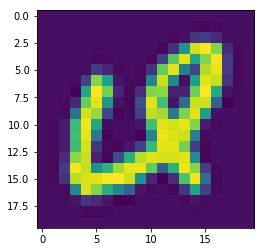

In [6]:
X = data['X']
y = data['y']
number = np.reshape(X[1234,:], (20, 20))
plt.imshow(number)
print(y[1234])

In [7]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [8]:
sigmoid(0)

0.5

In [9]:
sigmoid(1)

0.7310585786300049

In [10]:
theta = np.matrix(np.zeros((1,401)))

In [11]:
theta

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [12]:
def computeCost(X,y,theta):
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)

In [13]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [14]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [15]:
np.sum(y)

27500

In [16]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X = np.matrix(X)
y = np.matrix(y)

In [18]:
X

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y

matrix([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)

In [20]:
X = np.insert(X,0,1,axis=1)

In [21]:
X

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [22]:
computeCost(X,y,theta)

-17.051420641774662

In [23]:
def gradientDescents(X,y,theta,alpha,iterations):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = 401
    cost = np.zeros(iterations)
    #print(y[1600])
    for i in range(iterations):
        error=sigmoid(X*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

In [24]:
def modify(y,cur):
    for i in range(len(y)):
        if y[i][0]==cur:
            y[i][0]=1
        else:
            y[i][0]=0
    return y

In [56]:

a = np.array(np.zeros((10,401)))
b = np.array(np.zeros((10,1000)))
a.shape,b.shape

UsageError: Cell magic `%%heat` not found.


In [62]:
def myfunc():
    for i in range(1,11):
        #theta1  = np.zeros((1,401))
        #t=copy.deepcopy(theta1)
        #y_mod = copy.deepcopy(y)
        #y_i = modify(y_mod,i) 
        #np.unique(y_mod)
        #print(y_i[1600])
        a[i-1],b[i-1] = gradientDescents(X,modify(copy.deepcopy(y),i),np.matrix(np.zeros((1,401))),0.01,1000)

In [43]:
a[3][5], a[4][5]

(5.930835616086066e-06, 2.9848172286867764e-06)

In [63]:
%prun myfunc()

In [45]:
b

array([[-17.73508097, -18.39467586, -19.02996152, ..., -13.5889415 ,
        -13.5820961 , -13.57526258],
       [-18.05926239, -19.04631729, -20.01009725, ..., -24.40935416,
        -24.4014566 , -24.3935719 ],
       [-18.06055478, -19.04876292, -20.01352102, ..., -24.33393462,
        -24.32661815, -24.31931349],
       ...,
       [-18.15812831, -19.24781587, -20.31709587, ..., -34.45884003,
        -34.44898088, -34.43913553],
       [-18.02854604, -18.98504979, -19.91878619, ..., -31.17989365,
        -31.17168719, -31.16349161],
       [-18.05195934, -19.02751387, -19.97541373, ..., -13.14180514,
        -13.13670837, -13.13161968]])

In [46]:
all_hyp = sigmoid(X*np.matrix(a).T)
all_hyp.shape

(5000, 10)

In [47]:
#all_hyp=all_hyp.reshape(5000,10)

In [48]:
arr=np.array(np.zeros((5000,1)))
for i in range(5000):
    maxi=np.amax(np.array(all_hyp[i]))
    #print(maxi)
    for j in range(10):
        A=all_hyp[i,j]
       # print(A)
        if A==maxi:
            arr[i][0]=j+1
            break

In [49]:
arr


array([[10.],
       [10.],
       [ 8.],
       ...,
       [ 9.],
       [ 9.],
       [10.]])

In [50]:
r=0
for i in range(len(arr)):
    if arr[i]==y[i]:
            r+=1
print(r)

4208


In [51]:
r/5000*100

84.16

In [52]:
y

matrix([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)

In [53]:
X

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [54]:
X[2500]

matrix([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          2.34034586e-04, -2.66799428e-03, -8.79210659e-03,
          9.36138344e-05,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+0